In [1]:
using DelimitedFiles
using Plots

In [2]:
function analytical_psi(t, x)
    return sin(2 * pi * (x - t))
end

analytical_psi (generic function with 1 method)

## Uniform Grid

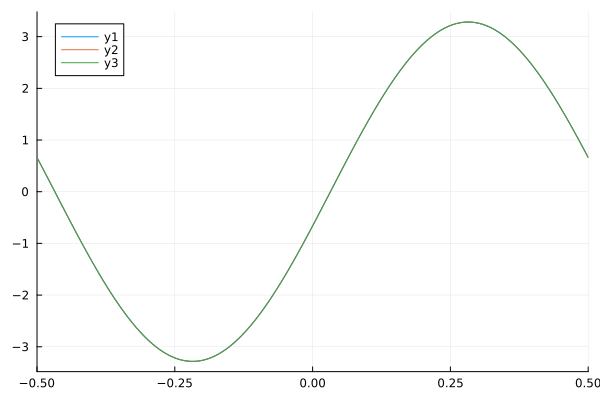

In [3]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"
dirs = [
    "scalarwave_1levels_nx100",
    "scalarwave_1levels_nx200",
    "scalarwave_1levels_nx400"
]
#
dxs = [0.01, 0.005, 0.0025]
tmax = 0.1
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == 1, data[:, 3]), 5]
            psi = data[findall(x -> x == 1, data[:, 3]), 6]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-4)
            plt = plot!(x, error, xlim=(-0.5, 0.5))
        end
    end
end
display(plt)

## 2 Levels

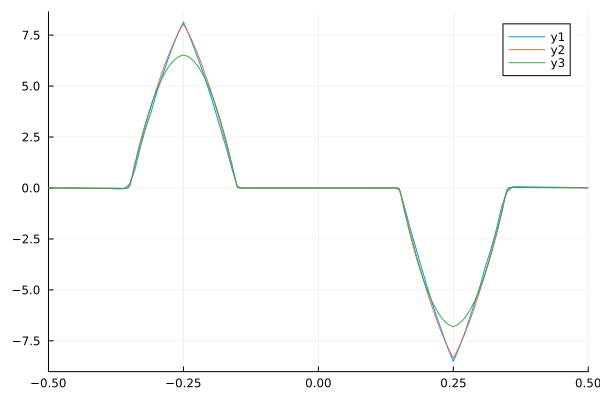

In [14]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"
dirs = [
    "scalarwave_2levels_nx100",
    "scalarwave_2levels_nx200",
    "scalarwave_2levels_nx400"
]
#
dxs = [0.01, 0.005, 0.0025]
tmax = 0.1
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            l = 1
            x = data[findall(x -> x == l, data[:, 3]), 5]
            psi = data[findall(x -> x == l, data[:, 3]), 6]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-3.15)
            plt = plot!(x, error, xlim=(-0.5, 0.5))
        end
    end
end
display(plt)

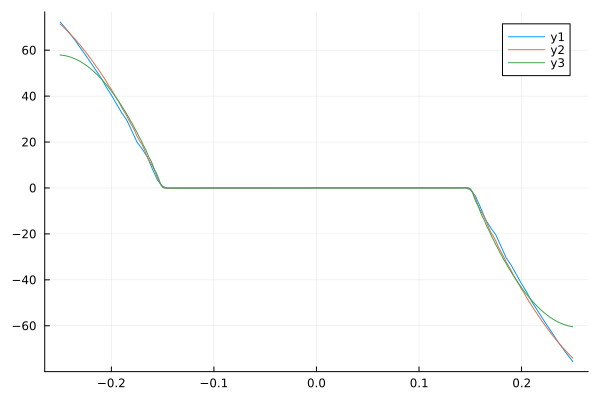

In [25]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"
dirs = [
    "scalarwave_2levels_nx100",
    "scalarwave_2levels_nx200",
    "scalarwave_2levels_nx400"
]
#
dxs = [0.005, 0.0025, 0.00125]
nxas = [101+24, 201+24, 401+24]
tmax = 0.1
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            l = 2
            x = data[findall(x -> x == l, data[:, 3]), 5][1+12:nxas[i]-12]
            psi = data[findall(x -> x == l, data[:, 3]), 6][1+12:nxas[i]-12]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-3.15)
            plt = plot!(x, error)
        end
    end
end
display(plt)